# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Solution to Assignment 5 posted on JupyterHub and Canvas
 - Assignment 6 due Sunday, November 15 at midnight
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)
 - Design Project will be assigned by 11/14
     - First phase submisson 12/5

## Week 7

 - Art of Electronics (AoE) Chapter 8

## Overview

- Last time...
    - Noise in resistors
    - Noise bandwidth
    - Flicker noise
    - Shot noise 
    - Diode/BJT noise sources
- Today
    - BJT noise model
    - MOSFET noise model
    - Opamp noise model
    - Analyzing noise in opamp circuits
    - Minimizing noise

## Python packages/modules

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

In [2]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 7 - Noise in Circuits

## BJT noise sources

<center><img src="img/BJT_noise_sources.png" width=1500 /></center>

 - $i_{nb}$ comprises the base-emitter shot noise current and flicker noise (in addition to burst noise, which is often negligible):
 
$$ i_{nb}^2 = 2qI_B + K_1 \dfrac{I_B^a}{f} $$
 
 - $e_{nbb}$ constitutes the thermal noise voltage of the BJT base resistance:
 
$$ e_{nbb}^2 = 4kT r_{bb} $$
 
 - $i_{nc}$ is the shot noise current of the collector-emitter junction:
 
$$ i_c^2 = 2qI_C$$

## BJT noise model

<center><img src="img/BJT_noise_model.png" width=500 /></center> 

$$ e_n^2 = \dfrac{2qI_C}{g_m^2} + 4kTr_{bb} $$

$$ \rightarrow e_n = \sqrt{\dfrac{2qI_C}{g_m^2} + 4kTr_{bb}} $$

$$ i_{n}^2 = i_{nb}^2 = 2qI_B + K_1 \dfrac{I_B^a}{f} $$

$$ \rightarrow i_n = \sqrt{ 2qI_B + K_1 \dfrac{I_B^a}{f} } $$

- $e_n$ and $i_n$ represent the BJT’s internal noise, modeled by a noise voltage $e_n$ in series with the input and a noise current $i_n$  injected at the input
- Collector current shot noise is referred to the input via the BJT transconductace $g_m$
- The transistor is assumed noiseless, and it amplifies (via its transconductance) the noise voltage that appears at the input
- Input-referred noise of opamps is derived in a similar manner

## Common-emitter amplifier 

<center><img src="img/CE_noise.png" width=500 /></center> 

$$ e_{n,in}^2 = e_n^2 + 4kTR_S + (i_n R_S)^2 $$

$$\rightarrow e_{n,out}^2 = e_{n,in}^2\cdot g_m^2 R_C^2 + 4kTR_C$$

 - The total input-referred mean-square noise density of the BJT is sum of $e_n^2$ and the product $(i_nR_S)^2$
 - In this case, we're assume $R_S << r_{\pi}$, which would typically be true to avoid significant loading effects

## MOSFET noise model

<center><img src="img/MOSFET_noise_model.png" width=800 /></center>

$$ i_{nd} = \sqrt{\frac{2}{3}4kTg_m} + i_{nf} \; A/\sqrt{Hz} $$

$$e_n = \dfrac{i_{nd}}{g_m} \; V/\sqrt{Hz} $$

 - The FET noise model is simpler, typically consisting of only thermal and $1/f$ drain current noise ($i_{nd}$)
 - As with BJT collector current noise, drain current noise can be referred to the gate of the MOSFET by dividing by transconductance $g_m$
 - Once again, referring noise to the input allows direct comparison with the input signal

## Common-source amplifier

 <center><img src="img/common_source_noise.png" width=350 /></center>
 

\begin{align}
e_{n,out} &= \sqrt{i_{nR}^2 + i_{nd}^2} \cdot R_D\\
\\
&=\sqrt{4kT \left( \dfrac{1}{R_D} + \dfrac{2}{3}g_m\right)}\cdot R_D
\end{align}


 - To determine the total output noise, we combine the mean-square current noise densities of both the FET and the drain resistor $R_D$
 - Both noise currents flow through the drain resistor $R_D$, so the output voltage noise density is the product of the combined noise current and $R_D$
 - Note that we have omitted $1/f$ noise for simplicity

## Input-referred noise density

 - We are often more interested in the noise as seen at the input to the amplifier
 - The output noise density is given by

$$ e_{n,out} =\sqrt{4kT \left( \dfrac{1}{R_D} + \dfrac{2}{3}g_m\right)}\cdot R_D $$

 - By dividing by the gain we refer the noise to the input of the amplifier:
 
$$ e_{n,in} = \dfrac{e_{n,out}}{g_m R_D} = \sqrt{4kT \left( \dfrac{1}{g_m^2 R_D} + \dfrac{2}{3}\dfrac{1}{g_m}\right)} \; V/\sqrt{Hz}$$
 
 - We see that the input-referred noise can be reduced by increasing $g_m$, which in general requires an increase in drain current (indicating a tradeoff between noise and power)


<center><img src="img/CS_input_referred_noise.png" height=300 /></center>

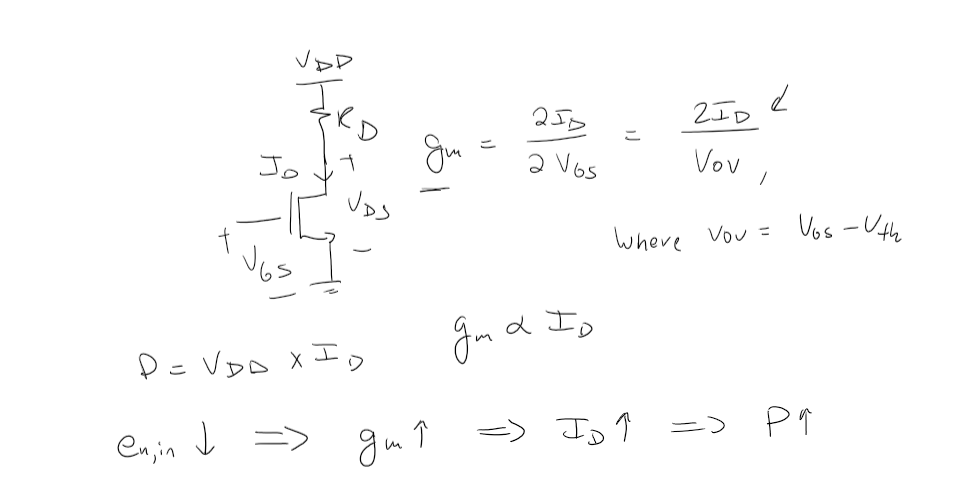

## Common-source noise bandwidth

<center><img src="img/CS_rms_noise.png" height=300 /></center>

 - Like noise in other circuits, transistor amplifier noise is band-limited, often by an explicit capacitive load
 - The $rms$ noise can be assessed using the concept of noise bandwidth
 - The $3dB$ bandwidth of the common-source amplifier is given by
 
 $$ f_{3dB} = \dfrac{1}{2\pi R_D C_L} $$
 
 
 - From which the noise bandwidth is determined to be
 
 $$ f_{enb} = \dfrac{\pi}{2}\cdot f_{3dB} = \dfrac{1}{4R_D C_L} $$
 


## Integrated (rms) noise

<center><img src="img/CS_rms_noise.png" height=300 /></center>

- The output noise density is given by

$$ e_{n,out} =\sqrt{4kT \left( \dfrac{1}{R_D} + \dfrac{2}{3}g_m\right)}\cdot R_D $$

- We can multipy this by the square root of the noise bandwidth to determine the $rms$ noise

\begin{align}
v_{n,out(rms)} &= e_{n,out}\cdot \sqrt{\dfrac{1}{4R_D C_L}} \\
\\
&= \sqrt{\dfrac{kT R_D}{C_L} \left( \dfrac{1}{R_D} + \dfrac{2}{3}g_m\right)}
\end{align}


## Opamp noise

 - Opamp noise is primarily due to the thermal, flicker, and shot noise of the transistors (and sometimes resistors) that make up the opamp
 - Opamp data sheets specify noise in terms of $e_n$ and $i_n$, just as with BJTs and FETs, often along with the $1/f$ corner frequency $f_c$
 - Sometimes, low frequency noise is specified as the *peak-to-peak* or *rms* noise in a given bandwidth
 - Opamp manufacturers measure the noise characteristics of a large sampling of a given device to determine the typical characteristics
 - There are inherent tradeoffs between accuracy, speed, input current, power dissipation, and cost

## Opamp noise model

 - The noise model of the opamp includes both voltage ($e_n$) and current ($i_n$) noise sources
 - $e_n$ and $i_n$ capture all of the noise sources of the opamp from transistors, resistors, diodes, etc.
 - When analyzing noise in opamp circuits, the effect of each uncorrelated noise source can be determined separately
 - The total output noise density can be assessed by applying superposition of all mean square noise expressions
 - The $rms$ output noise can then be calculated by integrating over the equivalent noise bandwidth of the amplifier

<center><img src="img/opamp_noise_model.png" width = 800 /></center>

In [1]:
ena = 10e-9
inn = 1e-12
Rth = 1e3
inn*Rth

1e-09

## Example: Non-inverting amplifier

<center><img src="img/non_inverting_noise_model.png" width=700/></center>

$$ e_{n1} = \sqrt{4kTR_1} \; V/\sqrt{Hz} $$

$$ e_{n2} = \sqrt{4kTR_2} \; V/\sqrt{Hz} $$

$$ 2nV/\sqrt{Hz} \leq e_{na} \leq 100nV/\sqrt{Hz} $$

 - To determine the total noise, we need to analyze the effect of each noise source independently, and combine the mean-square quantities  
 - Opamp voltage noise can vary widely, depending heavily on both the technology used (FET, BJT) and the opamp supply current
 - Note that we have ignored the effect of opamp input current noise source $i_{np}$, which can be significant if the source resistance is large

## Noise from R<sub>1</sub>

 - To determine the noise from the input resistance, we remove all other noise sources (superposition) and analyze the circuit
 - The input voltage noise sees an inverting gain stage, so the result is straightforward:
 
\begin{align}
e_{n1,out} &= \dfrac{R_2}{R_1}e_{n1} \\
\\
&= \dfrac{R_2}{R_1}\sqrt{4kTR_1} \; V/\sqrt{Hz}
\end{align}



<center><img src="img/R1_noise.png" width=700 /></center>



## Noise from R<sub>2</sub>

 - Again, we remove other noise sources to determine the effect of $R_2$’s noise
 - In this case, the noise is seen directly at the output (no gain) due to the virtual ground:

$$ e_{n2,out} = e_{n2} = \sqrt{4kTR_2} \; V/\sqrt{Hz} $$

 - Because $R_2$’s noise does see any gain, the output noise contribution from $R_1$ is greater


<center><img src="img/R2_noise.png" width=700 /></center>



## Alternate method using R<sub>2</sub>'s noise current

 - The effect of $R_2$’s noise can be assessed using $i_{n2}$, given as
 
 $$ i_{n2} = \sqrt{\dfrac{4kT}{R_2}} \; A/\sqrt{Hz} $$
 - Due to the virtual ground nodes on either side of $R_1$, all of $i_{n2}$ flows through $R_2$
 - The result is the same: the noise from $R_2$ appears at the output as

$$ e_{n2,out} = i_{n2}\cdot R_2 = \sqrt{4kTR_2} \; V/\sqrt{Hz} $$



<center><img src="img/R2_noise_current.png" width=700 /></center>

## Opamp voltage noise

 - The opamp noise as seen at the output can be determined in the same manner as the resistances
 - The input voltage noise of the opamp sees the gain of a non-inverting amplifier:

\begin{align}
e_{nav,out} &= \left( 1+ \dfrac{R_2}{R_2} \right)e_{na} \\
\end{align}


 - The relative magnitude of the opamp’s noise as compared to the resistors depends on $e_{na}$ and the closed-loop gain

<center><img src="img/opamp_noise_voltage.png" width=700 /></center>

## Opamp current noise

 - Once again, the ground potentials on either side of $R_1$ ensure all of $i_{na}$ flows through $R_2$, resulting in a voltage noise density at the output of 
 
\begin{align}
e_{nai,out} = i_{na}R_2 
\end{align}

<center><img src="img/opamp_noise_current.png" width=700 /></center>

## Input-referred noise density

 - The total output noise is determined by summing the mean-square output noise from all individual sources and taking the square root:

\begin{align}
e_{n,out} &= \sqrt{e_{n1,out}^2 + e_{n2,out}^2 + e_{nav,out}^2 + e_{nai,out}^2} \\
\\
 &= \sqrt{4kTR_1 \left(\dfrac{R_2}{R_1}\right)^2 + 4kTR_2 + e_{na}^2 \left(1+\dfrac{R_2}{R_1}\right)^2 + i_{na}^2R_2^2}
\end{align}

- The input-referred noise density is equal to the output noise density divided by the gain

\begin{align}
e_{n,in} &= \dfrac{e_{n,out}}{G} = \dfrac{R_1}{R_1+R_2} \cdot e_{n,out} \\
\\
 &= \left(\dfrac{R_1}{R_1+R_2}\right)\sqrt{4kTR_1 \left(\dfrac{R_2}{R_1}\right)^2 + 4kTR_2 + e_{na}^2 \left(1+\dfrac{R_2}{R_1}\right)^2 + i_{na}^2R_2^2}
\end{align}

## Input-referred voltage noise

<center><img src="img/input_referred_noise.png" width=1100 /></center>

 - We are ultimately concerned with the effect of all noise sources on a measured signal
 - To determine this, we begin with the input-referred noise density, multiply by the transfer function magnitude, and integrate over frequency:
 
 $$ v_{n,out(rms)} = \sqrt{\int_{0}^{\infty} e_{n,in}^2 \cdot \left|G(f)\right|^2 \;df}$$
 
 - We can then find the input-referred $rms$ noise by dividing by the gain in the *band of frequencies occupied by the signal*
 - In many cases, this will be the DC gain of the amplifier:
 
 $$ v_{n,in(rms)} = \dfrac{v_{n,out(rms)}}{|G(0)|} $$
 


## Example: Non-inverting amplifier rms noise

<center><img src="img/non_inverting_rms_noise.png" width=600 /></center>

$$f_{3dB} = \beta f_t $$

$$ f_{enb} = \dfrac{\pi}{2} f_{3dB} $$

\begin{align}
v_{n,out(rms)} &= e_{n,out}\cdot \sqrt{f_{enb}} \\
\\
&= |G(0)|\cdot e_{n,in(rms)}\cdot \sqrt{f_{enb}}\\
\\
&= \left(1+\dfrac{R_2}{R_1} \right)\cdot e_{n,in(rms)}\cdot \sqrt{f_{enb}}
\end{align}

 - Having determined the noise density of the amplifier, we can use the transfer function to determine the $rms$ noise
 - If the noise is white and the equivalent noise bandwidth can be determined, the output noise density can be multiplied by $f_{enb}$
 - Otherwise, it may be necesssary to refer the noise to the input, multiply by the transfer function magnitude, and integrate over frequency

<center><img src="img/non_inverting_rms_noise.png" width = 700 /></center>

$$ e_{na} = 10 nV/\sqrt{Hz}, \:\: i_{na} = 0$$

$$ f_t = 10 MHz \rightarrow f_{enb} \approx 1.43MHz $$ 

$$R_2 = 10k\Omega \rightarrow e_{n2} \approx 13 nV / \sqrt{Hz} $$

$$R_1 = 1k \Omega \rightarrow e_{n1} \approx 4 nV / \sqrt{Hz}  $$

 - The output noise density is given by

$$ e_{n,out} = \sqrt{4kTR_1 \left(\dfrac{R_2}{R_1}\right)^2 + 4kTR_2 + e_{na}^2 \left(1+\dfrac{R_2}{R_1}\right)^2 } \approx 118nV / \sqrt{Hz}$$

 - Using the noise bandwidth, we can calculate the output $rms$ noise directly:
 
$$ v_{n,out(rms)} = e_{n,out} \cdot \sqrt{ f_{enb}} \approx 141 \mu V $$

 - The input-referred noise is then calculated by dividing by the DC gain
 
$$ v_{n,in(rms)} =  \dfrac{v_{n,out(rms)}}{11 V/V} \approx 12.8 \mu V $$

## Effect of gain

<center><img src="img/multistage_noise.png" width=900 /></center>

 - The concept of input-referred noise allows us to quickly assess the effect of each stage in a multi-stage design
 - The total input-referred noise density of the "circuit" above is given by
 
$$ e_{n,in}^2 = e_{n1}^2 + \dfrac{e_{n2}^2}{G_1^2} $$ 
 
 - If $G_1$ and $G_2$ are identical, the noise due to $G_2$ is $G_1$ times than that from $G_1$
 - This can also be seen from the perspective of output noise:
 
$$ e_{n,out}^2 = G_1^2\cdot G_2^2 \cdot e_{n1}^2 + G_2^2 \cdot e_{n2}^2 $$ 

 - This is the reason it is important to realize gain early in the signal path, as it desensitizes the noise performance to noise sources that follow any gain stage

## Signal-to-noise ratio (SNR)

 - Signal-to-noise ratio is typically defined the ratio of $rms$ signal amplitude to the $rms$ noise
 - This can be determined at any point in the signal path, but it is often most convenient (and most meaningful) to determine SNR using the magnitude of the input signal and the $rms$ input-referred noise
 - For example, suppose we want to amplify and digitize a sensor signal with a peak-to-peak amplitude of $5mV$ and achieve an SNR of $\geq80dB$
 - The signal-to-noise ratio is given by
 
$$ SNR = 20 \log_{10}\dfrac{v_{sig(rms)}}{v_{n,in(rms)}} = 20 \log_{10}\dfrac{2.5mV/\sqrt{2}}{v_{n,in(rms)}} = 80dB $$
 
 - The *noise specification* is thus determined as
 
$$ v_{n,in(rms)} \leq \dfrac{1.77mV}{10^{80dB/20}} = 177nV $$
 
 - What do we need to do to reduce noise to meet a given SNR specification?

## Reducing noise bandwidth (i.e. filtering)

 - In most cases, amplifier bandwidth will be much wider than that required by our application
 - Taking the previous example of a non-inverting amplifier, the $3dB$ bandwidth was given as 
 
$$f_{3dB} = \beta f_t \approx 909kHz$$
 
 
 - For example, let's assume our application requires that we amplify signals with a maximum of 1% attenuation at $10kHz$
 - If we use a 1<sup>st</sup>-order filter, this dictates a filter transfer function given by
 
$$ \dfrac{1}{\sqrt{1+(2\pi \cdot 10kHz)^2/(2\pi\cdot f_{3dB})^2}}= 0.99 \rightarrow f_{3dB} = 70.2kHz$$
 
 - The resulting noise bandwidth is
 
$$ f_{enb} = \dfrac{\pi}{2}f_{3dB} = 110.27 kHz $$

 - That is, in order to achieve a *signal bandwidth* of $~10kHz$, our *noise bandwidth* is 10 times higher!
 

 
 

## Resulting rms noise

 - What does this mean in terms of noise?
 - The $rms$ output noise is for the filter in the previous example is
 
$$ v_{n,out(rms)} = 118 nV/\sqrt{Hz} \cdot \sqrt{110.27 kHz} = 39 \mu V $$
 
 - And the input-referred noise
 
$$ v_{n,in(rms)} = \dfrac{ 39 \mu V}{11 V/V} = 3.55 \mu V$$

 - This is much lower than if we rely on the amplifier bandwidth alone, but what if our application demands even lower noise?

## Minimizing noise

 - One option for reducing noise is to choose components to minimize noise (e.g. an opamp with lower voltage noise or smaller resistor values) 
 - However, our minimum *noise floor* is limited by practical component values and available amplifier options
 - In order to reduce noise even further, it may be necessary to implement filters with "sharper" rolloff characteristics (i.e. greater than $20dB/dec$)
 - This requires higher order filters, i.e. those with multiple poles, which we will take a look at next week